In [1]:
from matplotlib import pyplot as plt
import seaborn as sns

from scipy import stats
import pandas as pd
import numpy as np

In [2]:
#display DataFrame
from IPython.display import display ,HTML
css = ".output{flex-direction:row;}"
HTML('<style>{}</style>'.format(css))


In [3]:
test = pd.read_csv("./titanic/test.csv")
train = pd.read_csv("./titanic/train.csv")
draw_df = train.append(test)#畫圖用

In [4]:
test.shape

(418, 11)

In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


### 基本欄位的型態、關係
欄位|中文意思|變數型態
:-:|:-:|:-:
PassengerId|編號|離散變數
Pclass|船艙等級|離散變數
Name|名字|離散變數
Sex|性別|離散變數
Age|年齡|<font color=#ff0000>連續變數</font>
SibSp|同為兄弟姐妹或配偶的數目|離散變數
Parch|同為家族的父母及小孩的數目|離散變數
Ticket|船票編號|離散變數
Fare|價格|<font color=#ff0000>連續變數</font>
Cabin|船艙號碼|離散變數
Embarked|登船的口岸|離散變數

In [6]:
#取出目標變數的部分
y_train= train["Survived"]
train.drop(columns="Survived",inplace=True)

In [7]:
#將train,test 兩個df給結合
master_df = pd.concat([train,test]).reset_index(drop=True)
work_df = master_df.copy()
work_df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
#確認空值部分
work_df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

### 畫圖:性別（離散）跟存活（離散）的關性

'從整體來看的話可以看到女生的存活率是遠高於男性，死亡率也是遠低於男性的，可以看到巨大的差異存在，有助於模型的運用'

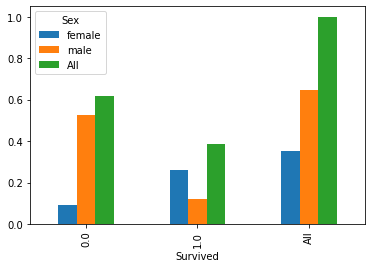

In [9]:
pd.crosstab(draw_df["Survived"],draw_df["Sex"],normalize=True,margins=True).plot.bar()
"""從整體來看的話可以看到女生的存活率是遠高於男性，死亡率也是遠低於男性的，可以看到巨大的差異存在，有助於模型的運用"""

### 畫圖:艙等（離散）跟存活（離散）的關性

In [10]:
draw_df[["Pclass","Survived"]].groupby("Pclass").mean()

,Survived
Pclass,
1,0.629630
2,0.472826
3,0.242363


'上表Pcalss1的在存活人數上的多的約62%，\n此圖可以看到Pcalss2\x03的死亡人數都大於存活人數尤其是Pclass3，\n可以看到各個艙等都有巨大的差距，而不是顯示較為平均的存活率，\n'

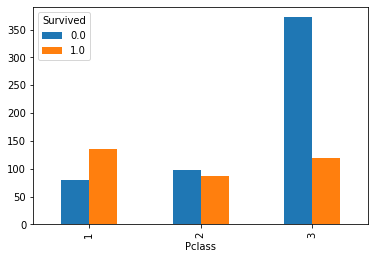

In [11]:
pd.crosstab(draw_df["Pclass"],draw_df["Survived"]).plot.bar()
"""上表Pcalss1的在存活人數上的多的約62%，
此圖可以看到Pcalss2\3的死亡人數都大於存活人數尤其是Pclass3，
可以看到各個艙等都有巨大的差距，而不是顯示較為平均的存活率，
"""

### 畫圖:船票（連續）跟存活（離散）的關性

'可以看到Pclass越高的錢付的越多，並且活的人所付的錢都大於死亡的人所附的錢，\n上圖顯示艙等越高的話存活率也越高，代表付更多的錢存活率有可能會越高\n'

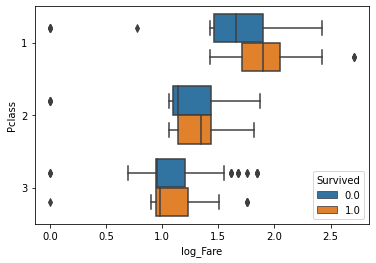

In [12]:
#將Fare做log 解決偏態
draw_df["log_Fare"] = (draw_df["Fare"]+1).map(lambda x : np.log10(x) if x >0 else 0)
sns.boxplot(data=draw_df ,x="log_Fare",y="Pclass" ,hue="Survived" ,orient="h")
"""可以看到Pclass越高的錢付的越多，並且活的人所付的錢都大於死亡的人所附的錢，
上圖顯示艙等越高的話存活率也越高，代表付更多的錢存活率有可能會越高
"""

### 畫圖:年齡（連續）跟存活（離散）的關性

<AxesSubplot:xlabel='Age', ylabel='Sex'>

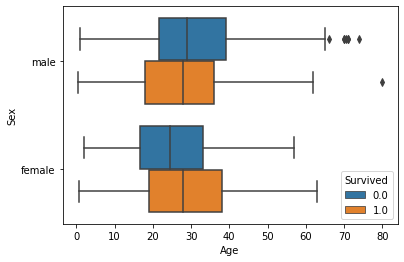

In [13]:
draw_df["log_Age"] =(draw_df["Age"]+1).map(lambda x : np.log10(x) if x >0 else 0)
sns.boxplot(data=draw_df ,x="Age", y="Sex" ,hue="Survived",orient="h")

年齡跟死亡率的合須圖來看，存活、死亡的年齡中位數無相差太多，加上性別的話也無太大的差異


### 畫圖:Cabin 船艙號碼（連續）跟存活（離散）的關性

In [14]:
#先對船艙號碼先補值在做計算
draw_df["Cabin"]=draw_df.Cabin.fillna(method="bfill").fillna(work_df.Cabin.dropna().map(lambda x :str(x)[0]).value_counts().index[0]).map(lambda x :str(x)[0])
draw_df.groupby(["Cabin"])["Sex"].agg("count")

Cabin
A     89
B    321
C    404
D    200
E    180
F     92
G     21
T      2
Name: Sex, dtype: int64

In [15]:
draw_df[["Cabin","Survived"]].groupby("Cabin").mean()

,Survived
Cabin,
A,0.375000
B,0.387255
C,0.393574
D,0.354839
E,0.411765
F,0.365079
G,0.333333
T,0.500000


主要船倉（Ｂ、Ｃ、Ｄ、Ｅ）的存活率的較為平均，無明顯的特徵，會排除該欄位

### Embarked 登船口岸（連續）跟存活（離散）的關性

In [16]:
#從哪些口岸登船的男女個數
pd.pivot_table(draw_df ,index="Embarked" ,columns=["Sex"] ,values="Survived" ,aggfunc="count" )

Sex,female,male
Embarked,,
C,73,95
Q,36,41
S,203,441


<AxesSubplot:xlabel='Embarked'>

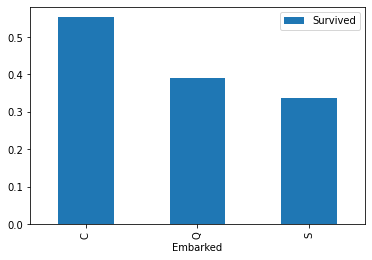

In [17]:
#從哪些口岸登船的總體存活率
draw_df[["Embarked","Survived"]].groupby("Embarked").mean().plot.bar()

可以看到Q\S的存活率較為相近，可能是Ｓ登船口的男女分佈不平均而導致活率率較低，再者三個登船口岸，無呈現像船艙般明顯的級距的差別

### Ticket（離散） 的關係

In [18]:
print(draw_df["Ticket"].value_counts() )#共有929張，代表相同家庭的人票應該是一樣的

CA. 2343            11
1601                 8
CA 2144              8
347082               7
347077               7
                    ..
SC/PARIS 2133        1
STON/O2. 3101283     1
248698               1
C 7076               1
335097               1
Name: Ticket, Length: 929, dtype: int64


([<matplotlib.axis.XTick at 0x7fe77a19edc0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

<Figure size 1440x576 with 0 Axes>

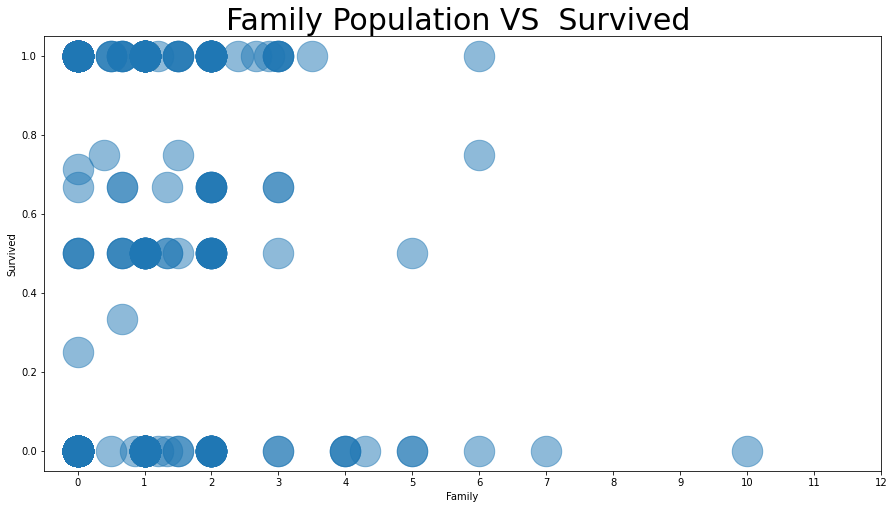

In [19]:
#船票對應的家庭人數
plt.figure(figsize=(20,8))
draw_df["Family"] = draw_df.Parch+draw_df.SibSp#將人數加總，方面計算親人的總數
Family_Survived=draw_df[["Ticket","Family","Survived"]].groupby("Ticket").mean().reset_index(drop=False).sort_values(by="Family",ascending=False)
Family_Survived.plot.scatter(x="Family",y="Survived",s=len(draw_df["Ticket"].value_counts()),figsize=(15,8),alpha=0.5)
plt.title("Family Population VS  Survived ",fontsize=30)
plt.xticks(np.arange(0,13,1))

在存活率不為零的部分，為零的部分，在X軸上都有分布，但以不為零的話還是佔大多數，且X軸的部分約聚集在1~3之間，<br>
說明再有親人的情況下，活率可能較高

### 做轉換、補值

In [20]:
#確認空值部分
work_df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [38]:
#性別轉換
work_df["Sex"]=work_df["Sex"].replace({"female":1,"male":0})
#把親人的總數給加總，縮小關於親人的特徵判斷
work_df["Family"]=work_df["SibSp"]+work_df["Parch"]
#Cabin 缺值填補、縮小類別
work_df["Cabin"]=work_df.Cabin.fillna(method="bfill").fillna(work_df.Cabin.dropna().map(lambda x :str(x)[0]).value_counts().index[0]).map(lambda x :str(x)[0])
#Fare價格填補、用中位數當補值
work_df["Fare"]=work_df["Fare"].fillna(np.nanmedian(work_df["Fare"]))
#Embarked 填補缺失，用最多的去填 ，
work_df["Embarked"]=work_df["Embarked"].fillna(work_df.Embarked.value_counts().index[0])

In [39]:
ohe=pd.get_dummies(work_df[["Embarked"]])

In [40]:
#取出需要的欄位
work_df_2 =pd.concat([ work_df[["Pclass","Sex","Age","Family","Fare"]] ,ohe],axis=1)
work_df_2

,Pclass,Sex,Age,Family,Fare,Embarked_C,Embarked_Q,Embarked_S
0,3,0,22.0,1,7.2500,0,0,1
1,1,1,38.0,1,71.2833,1,0,0
2,3,1,26.0,0,7.9250,0,0,1
3,1,1,35.0,1,53.1000,0,0,1
4,3,0,35.0,0,8.0500,0,0,1
...,...,...,...,...,...,...,...,...
1304,3,0,NaN,0,8.0500,0,0,1
1305,1,1,39.0,0,108.9000,1,0,0
1306,3,0,38.5,0,7.2500,0,0,1
1307,3,0,NaN,0,8.0500,0,0,1


#### Age補值，使用KNN 使分布較為常態分布

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

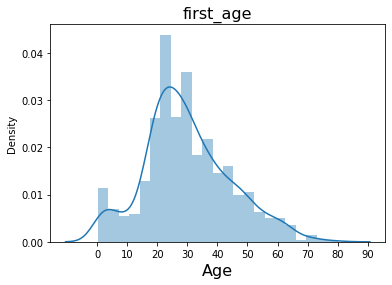

In [41]:
#1.畫圖看分佈
sns.distplot(work_df["Age"])
plt.title("first_age" ,fontsize=16)
plt.xticks(np.arange(0,100,10))
plt.xlabel("Age" ,fontsize=16)

In [42]:
#2.補值
from sklearn.impute import KNNImputer
knnI= KNNImputer(weights="distance")
age_fill=pd.DataFrame(knnI.fit_transform(work_df_2))
work_df_2["Age"] = age_fill[2]

/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.8/lib/python3.8/site-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 0, 'Age')

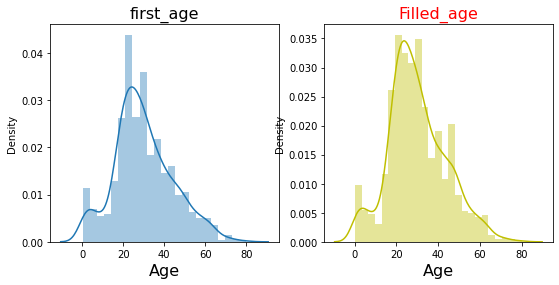

In [43]:
#3.前後對照
fig ,axes =plt.subplots(1,2 , figsize=(9,4))
sns.distplot(work_df["Age"] ,ax =axes[0])
axes[0].set_title("first_age" ,fontsize=16)
axes[0].set_xlabel("Age",fontsize=16)
sns.distplot(work_df_2["Age"] ,ax =axes[1] ,color="y")
axes[1].set_title("Filled_age" ,fontsize=16 ,color="r")
axes[1].set_xlabel("Age",fontsize=16)

 結果還算是符合原本的分佈型態


In [44]:
#再次確認有無空值
work_df_2.isnull().sum()

Pclass        0
Sex           0
Age           0
Family        0
Fare          0
Embarked_C    0
Embarked_Q    0
Embarked_S    0
dtype: int64

#### 對各個變數跟目標間 ：關係探討

In [45]:
relation_ =work_df_2.copy()
relation_["Survived"] =draw_df["Survived"].reset_index(drop=True)
relation_.dropna(inplace=True)

In [46]:
relation_

,Pclass,Sex,Age,Family,Fare,Embarked_C,Embarked_Q,Embarked_S,Survived
0,3,0,22.00000,1,7.2500,0,0,1,0.0
1,1,1,38.00000,1,71.2833,1,0,0,1.0
2,3,1,26.00000,0,7.9250,0,0,1,1.0
3,1,1,35.00000,1,53.1000,0,0,1,1.0
4,3,0,35.00000,0,8.0500,0,0,1,0.0
...,...,...,...,...,...,...,...,...,...
886,2,0,27.00000,0,13.0000,0,0,1,0.0
887,1,1,19.00000,0,30.0000,0,0,1,1.0
888,3,1,18.78997,3,23.4500,0,0,1,0.0
889,1,0,26.00000,0,30.0000,1,0,0,1.0


In [47]:
#區分連續、離散
target_num =["Survived"]#離散
num_=["Fare","Age"]#連續
continuous =["Pclass","Sex","Family","Embarked_C","Embarked_Q","Embarked_S"]#離散


#### 連續ＶＳ離散 單變數關係確認


In [48]:
import pingouin as pg
for i in num_:
    aov=pg.anova(dv=i, between='Survived', data=relation_, detailed=True)
    etaSq=aov.SS[0] / (aov.SS[0] + aov.SS[1])
    if etaSq < .01:
        qual = 'Negligible'
    elif etaSq < .06:
        qual = 'Small'
    elif etaSq < .14:
        qual = 'Medium'
    else:
        qual = 'Large'
   
    print(i,":",etaSq," >>" ,qual)
    

Fare : 0.06620664646184321  >> Medium
Age : 0.007536958926954754  >> Negligible


#### 離散ＶS 離散 單變數關係確認

In [49]:
import researchpy
for i in continuous:
    contTable = pd.crosstab(relation_[i], relation_['Survived'])
    df = min(contTable.shape[0], contTable.shape[1]) - 1
    crosstab, res = researchpy.crosstab(relation_[i], relation_['Survived'], test='chi-square')
    V=res.loc[2,'results']#Cramer's value 
    if V < 0.10:
        qual = 'negligible'
    elif V < 0.30:
        qual = 'small'
    elif V < 0.50:
        qual = 'medium'
    else:
        qual = 'large'
        
    print(i,":","Cramer's value is",V,">>",qual)
    

去除Embarked的部分

### Test1進入模型模型 :使用



In [52]:
#1.import 需要的模型
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.pipeline import make_pipeline
from sklearn.ensemble import  RandomForestClassifier


In [53]:
#2.分切訓練、預測集
x_train = work_df_2.iloc[:train.shape[0],:5]#訓練集
x_test = work_df_2.iloc[train.shape[0]:,:5]#測試集
x_train.columns 

Index(['Pclass', 'Sex', 'Age', 'Family', 'Fare'], dtype='object')

In [54]:
#3.建例模型

pipe_lr = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=2 ,n_estimators=250
                                                               ,min_samples_split=20))

from sklearn.model_selection import cross_val_score
score = cross_val_score(estimator=pipe_lr , X= x_train ,y=y_train, cv=10 , n_jobs=1)
print("CV score :%s" %score)
print("Test Accury : %.3f +/- %.3f " % (np.mean(score),np.std(score)))


CV score :[0.78888889 0.83146067 0.73033708 0.8988764  0.91011236 0.85393258
 0.86516854 0.79775281 0.87640449 0.83146067]
Test Accury : 0.838 +/- 0.052 


In [55]:
pipe_lr.fit(x_train,y_train)

Pipeline(steps=[('standardscaler', StandardScaler()),
                ('randomforestclassifier',
                 RandomForestClassifier(min_samples_split=20, n_estimators=250,
                                        random_state=2))])

In [56]:
y_predict=pipe_lr.predict(x_test)

In [57]:
y_true=pd.read_csv("./titanic/gender_submission.csv")
from sklearn.metrics import accuracy_score

accuracy_score(y_true["Survived"],y_predict)

0.8995215311004785

In [58]:
end_df = y_true.copy()
end_df["Survived"] =y_predict
#end_df.to_csv("Titanic_predict_3.csv",index=False)

### 第三次 上傳kaggle 改用 RandomForestClassifier 
![](./score/Titanic_test3.png)

### test4 

In [59]:
#針對船票的部分做範圍的區分，連續轉變成離散
Fare_df = work_df_2.iloc[:,:5].copy()
Fare_df["Survived"] =draw_df["Survived"].reset_index(drop=True)
Fare_df


,Pclass,Sex,Age,Family,Fare,Survived
0,3,0,22.000000,1,7.2500,0.0
1,1,1,38.000000,1,71.2833,1.0
2,3,1,26.000000,0,7.9250,1.0
3,1,1,35.000000,1,53.1000,1.0
4,3,0,35.000000,0,8.0500,0.0
...,...,...,...,...,...,...
1304,3,0,41.500000,0,8.0500,NaN
1305,1,1,39.000000,0,108.9000,NaN
1306,3,0,38.500000,0,7.2500,NaN
1307,3,0,41.500000,0,8.0500,NaN


In [60]:
Fare_df["Fare_qcut_4"]=pd.qcut(Fare_df["Fare"],4)#切4個
Fare_df["Fare_qcut_5"]=pd.qcut(Fare_df["Fare"],5)#切5個
Fare_df["Fare_qcut_6"]=pd.qcut(Fare_df["Fare"],6)#切6個

#做等級轉換 LabelEncoder
from sklearn.preprocessing import LabelEncoder
labeE =LabelEncoder()
Fare_df["Fare_LabE_4"] =labeE.fit_transform(Fare_df["Fare_qcut_4"])#做等級轉換 LabelEncoder，有順序性
Fare_df["Fare_LabE_5"] =labeE.fit_transform(Fare_df["Fare_qcut_5"])#做等級轉換 LabelEncoder，有順序性
Fare_df["Fare_LabE_6"] =labeE.fit_transform(Fare_df["Fare_qcut_6"])#做等級轉換 LabelEncoder，有順序性

In [61]:
#做 cross_table Fare VS Pclass
df_Fare_4=pd.crosstab(Fare_df["Pclass"],Fare_df["Fare_LabE_4"])
df_Fare_5=pd.crosstab(Fare_df["Pclass"],Fare_df["Fare_LabE_5"])
df_Fare_6=pd.crosstab(Fare_df["Pclass"],Fare_df["Fare_LabE_6"])
display(df_Fare_4)
display(df_Fare_5)
display(df_Fare_6)

Fare_LabE_4,0,1,2,3
Pclass,,,,
1,8,0,77,238
2,6,128,104,39
3,323,193,147,46


Fare_LabE_5,0,1,2,3,4
Pclass,,,,,
1,8,0,0,95,220
2,6,36,124,99,12
3,261,218,132,71,27


Fare_LabE_6,0,1,2,3,4,5
Pclass,,,,,,
1,8,0,0,14,118,183
2,6,0,128,83,48,12
3,222,218,76,128,46,19


Text(0.5, 1.0, 'Fare_LabE_6 VS Survived')

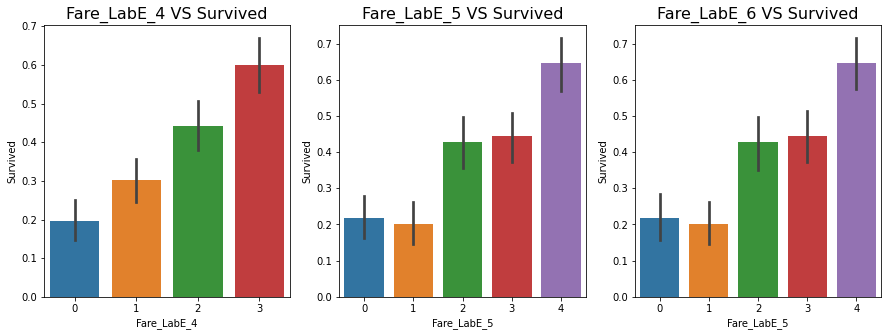

In [62]:
fig ,axes =plt.subplots(1,3 , figsize=(15,5))
sns.barplot(x="Fare_LabE_4" ,y="Survived" ,data =Fare_df  ,ax=axes[0])
sns.barplot(x="Fare_LabE_5" ,y="Survived" ,data =Fare_df  ,ax=axes[1])
sns.barplot(x="Fare_LabE_5" ,y="Survived" ,data =Fare_df  ,ax=axes[2])
axes[0].set_title("Fare_LabE_4 VS Survived" ,fontsize=16)
axes[1].set_title("Fare_LabE_5 VS Survived" ,fontsize=16)
axes[2].set_title("Fare_LabE_6 VS Survived" ,fontsize=16)



In [127]:
#切分測試跟資料集
#4等分
work_Fare_4 = work_df_2[["Pclass","Sex","Family","Fare"]]
work_Fare_4["Fare"] = Fare_df["Fare_LabE_4"]
x_trian_4 = work_Fare_4.iloc[:train.shape[0],:]#訓練集
x_test_4 =work_Fare_4.iloc[train.shape[0]:,:]#測試集
#五等分
work_Fare_5= work_df_2[["Pclass","Sex","Family","Fare"]]
work_Fare_5["Fare"] = Fare_df["Fare_LabE_5"]
x_trian_5 = work_Fare_5.iloc[:train.shape[0],:]#訓練集
x_test_5=work_Fare_5.iloc[train.shape[0]:,:]#測試集
#六等分
work_Fare_6= work_df_2[["Pclass","Sex","Family","Fare"]]
work_Fare_6["Fare"] = Fare_df["Fare_LabE_6"]
x_trian_6 = work_Fare_6.iloc[:train.shape[0],:]#訓練集
x_test_6 =work_Fare_6.iloc[train.shape[0]:,:]#測試集


Fare_train ={"Fare_4":x_trian_4,"Fare_5":x_trian_5,"Fare_6":x_trian_6}

Fare_test ={"Fare_4":x_test_4,"Fare_5":x_test_5,"Fare_6":x_test_6}

<ipython-input-127-a3e86512b0cc>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_Fare_4["Fare"] = Fare_df["Fare_LabE_4"]
<ipython-input-127-a3e86512b0cc>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  work_Fare_5["Fare"] = Fare_df["Fare_LabE_5"]
<ipython-input-127-a3e86512b0cc>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-d

In [128]:
#進模型
for i,j in Fare_train.items():
    
    pipe_lr = make_pipeline(StandardScaler(),RandomForestClassifier(random_state=2 ,n_estimators=250
                                                               ,min_samples_split=20))

    from sklearn.model_selection import cross_val_score
    score = cross_val_score(estimator=pipe_lr , X= j ,y=y_train, cv=10 , n_jobs=1)
    print(i,">> CV score :%s" %score)
    print(i,">> Test Accury : %.3f +/- %.3f " % (np.mean(score),np.std(score)))
    print("")

Fare_4 >> CV score :[0.74444444 0.84269663 0.7752809  0.80898876 0.88764045 0.79775281
 0.82022472 0.75280899 0.83146067 0.78651685]
Fare_4 >> Test Accury : 0.805 +/- 0.041 

Fare_5 >> CV score :[0.76666667 0.79775281 0.76404494 0.85393258 0.85393258 0.7752809
 0.82022472 0.75280899 0.83146067 0.79775281]
Fare_5 >> Test Accury : 0.801 +/- 0.035 

Fare_6 >> CV score :[0.76666667 0.83146067 0.76404494 0.85393258 0.84269663 0.78651685
 0.80898876 0.74157303 0.82022472 0.7752809 ]
Fare_6 >> Test Accury : 0.799 +/- 0.036 



In [131]:
for i,j in zip(Fare_train.items(),Fare_test.items()):
    pipe_lr.fit(i[1],y_train)
    y_predict=pipe_lr.predict(j[1])
    y_true=pd.read_csv("./titanic/gender_submission.csv")
    from sklearn.metrics import accuracy_score
    print(i[0],accuracy_score(y_true["Survived"],y_predict))

print("Fare_5,Fare_6的結果並無相差多少，以切5份為優先")

Fare_4 0.9210526315789473
Fare_5 0.9473684210526315
Fare_6 0.9425837320574163
Fare_5,Fare_6的結果並無相差多少，以切5份為優先


In [135]:
#輸出答案
pipe_lr.fit(x_trian_5,y_train)
y_predict_fare_5=pipe_lr.predict(x_test_5)
y_true_fare_5=pd.read_csv("./titanic/gender_submission.csv")
y_true_fare_5["Survived"]= y_predict_fare_5
y_true_fare_5.to_csv("Titanic_predict_4.csv",index=False)
    
    
    

### 第4次 上傳kaggle 去除 Age \ 將Fare以離散的方式呈現
![](./score/Titanic_test4.png)